In [1]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/midterm_data.csv")

In [3]:
df.head() # taking an overview of the data

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


From the above data we can conclude that: The percentage of missing values in each column:

    -Column "userID": 0% missing values
    -Column "age": 0% missing values
    -Column "sessions": 0% missing values
    -Column "time_spent": 0% missing values
    -Column "pages_visited": 0% missing values
    -Column "cart_items": 0% missing values
    -Column "cart_value": 0% missing values
    -Column "checkout_status": 0% missing values
    -Column "device": 2% missing values
    -Column "location": 0.6% missing values

In [5]:
# taking an overview of the data
df.describe(include="all")

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


    -User Age: The average age of the users is 41.54 years, with a median age of 42 years.
    -Sessions: Users have an average of 5.03 sessions, with a median of 5 sessions.
    -Time Spent: Users spend an average of approximately 25.16 units of time, with a median of 25.04 units.
    -Pages Visited: On average, users visit around 5.77 pages, with a median of 6 pages.
    -Cart Items: Users have an average of 14.97 items in their cart, with a median of 15 items.
    -Cart Value: The average cart value is approximately 149.44 units, with a median of 143.44 units.
    -Checkout Status: About 27.24% of the users have a checkout status of 1 (successful checkout).

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


Lets do some visualization of the data 

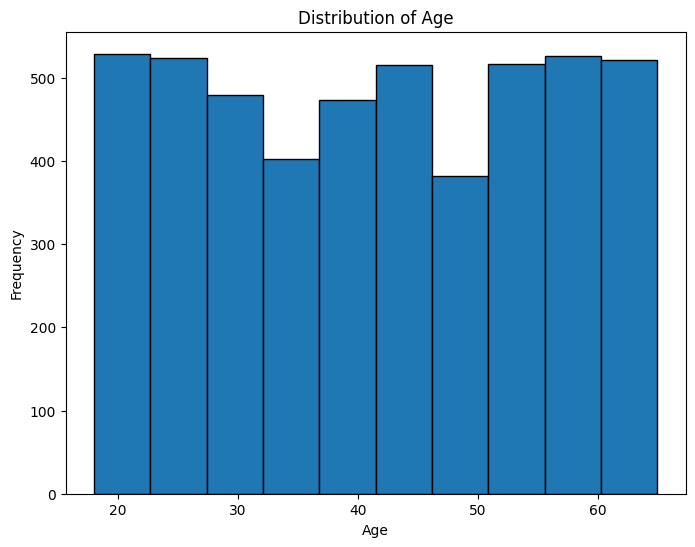

In [9]:
# Visualize the 'age' column using a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

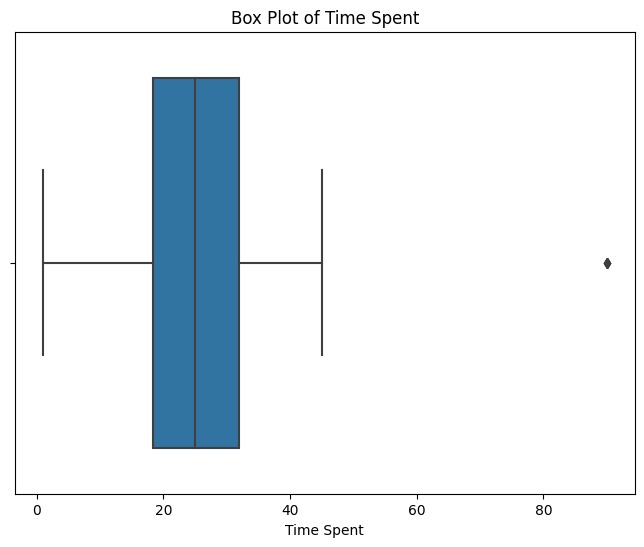

In [10]:
# Visualize the 'time_spent' column using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['time_spent'])
plt.xlabel('Time Spent')
plt.title('Box Plot of Time Spent')
plt.show()

WE see outliers so we will handel it now

In [11]:
df[df['time_spent']>80] 

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
284,285,47,5,90.0,12,14,148.45,0,Desktop,Location 4
2494,2495,28,2,90.0,12,18,151.35,0,Desktop,Location 1
2833,2834,30,8,90.0,12,7,88.32,0,Desktop,Location 1
3957,3958,19,1,90.0,12,20,228.70,0,Desktop,Location 4


In [12]:
df.drop([284,2494,2833,3957],axis=0,inplace=True)

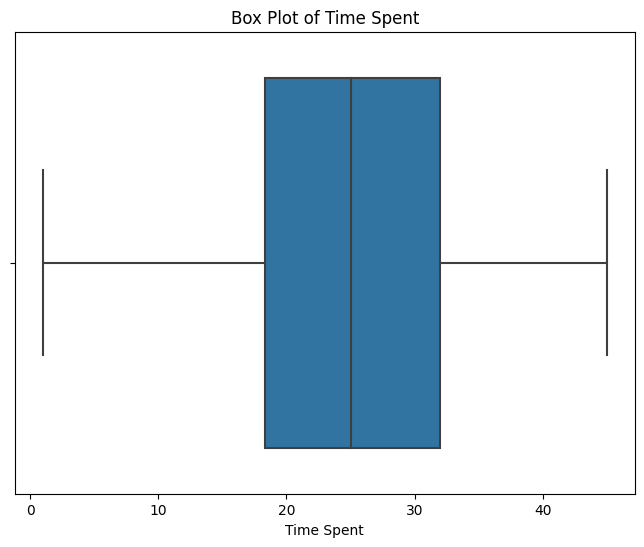

In [13]:
# Visualize the 'time_spent' column using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['time_spent'])
plt.xlabel('Time Spent')
plt.title('Box Plot of Time Spent')
plt.show()

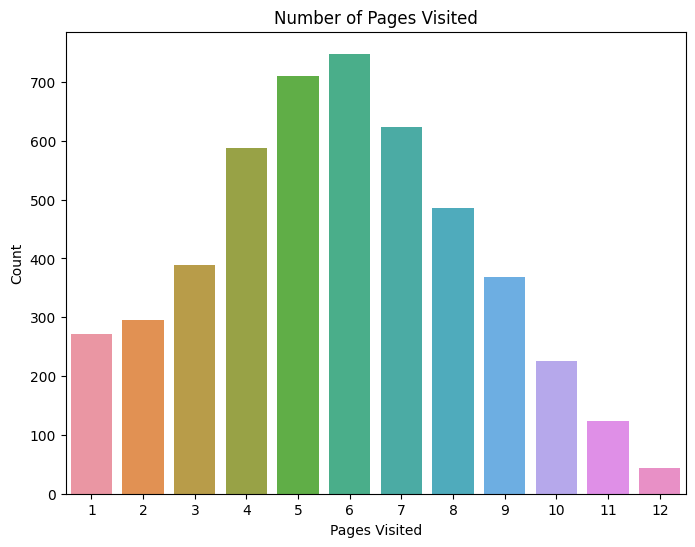

In [14]:
# Visualize the 'pages_visited' column using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x=df['pages_visited'])
plt.xlabel('Pages Visited')
plt.ylabel('Count')
plt.title('Number of Pages Visited')
plt.show()

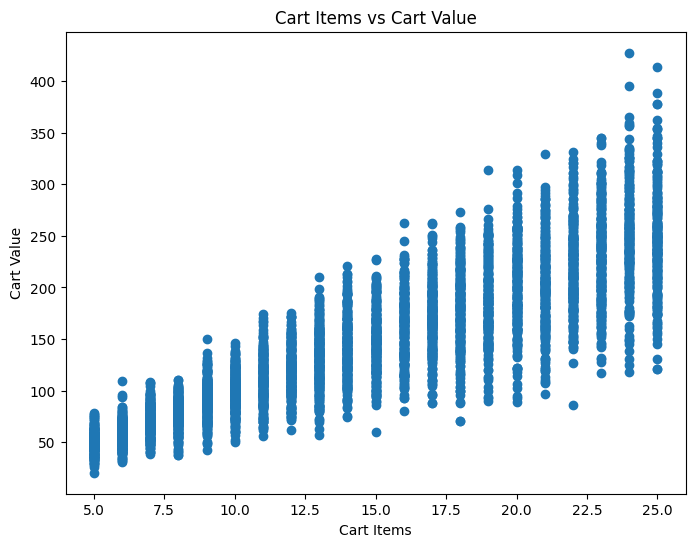

In [15]:
# Visualize the 'cart_items' column using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['cart_items'], df['cart_value'])
plt.xlabel('Cart Items')
plt.ylabel('Cart Value')
plt.title('Cart Items vs Cart Value')
plt.show()

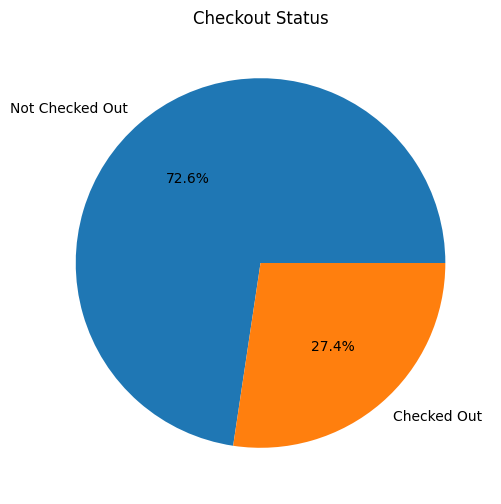

In [16]:
# Visualize the 'checkout_status' column using a pie chart
plt.figure(figsize=(8, 6))
checkout_labels = ['Not Checked Out', 'Checked Out']
checkout_counts = df['checkout_status'].value_counts()
plt.pie(checkout_counts, labels=checkout_labels, autopct='%1.1f%%')
plt.title('Checkout Status')
plt.show()

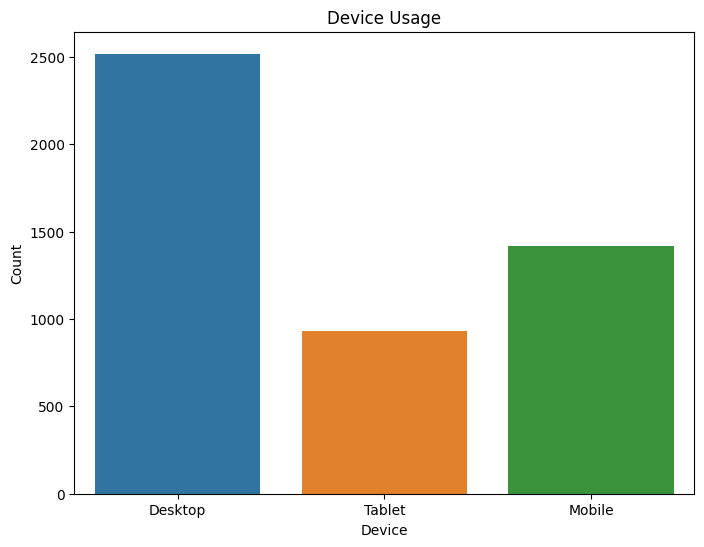

In [17]:
# Visualize the 'device' column using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x=df['device'])
plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Device Usage')
plt.show()

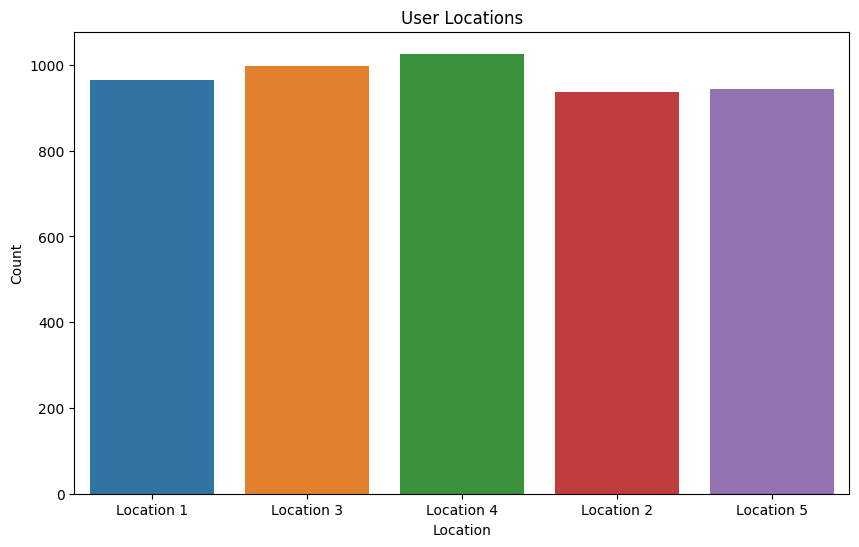

In [18]:
# Visualize the 'location' column using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['location'])
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('User Locations')
plt.show()

Apart from time spent the entire data set seems to be normally distributed

Let's perform some descriptive analysis to measures things such as average time spent, pages visited, cart value. By comparing these statistics between the two groups, we can try identifing any notable differences.

In [19]:
avg_time_spent_checkout = df[df['checkout_status'] == 1]['time_spent'].mean()
avg_time_spent_no_checkout = df[df['checkout_status'] == 0]['time_spent'].mean()
print("Behavior and Characteristics of Users who completed checkout:Average time spent: {:.2f} minutes".format(avg_time_spent_checkout))
print("Behavior and Characteristics of Users who did not complete checkout:Average time spent: {:.2f} minutes".format(avg_time_spent_no_checkout))

Behavior and Characteristics of Users who completed checkout:Average time spent: 31.32 minutes
Behavior and Characteristics of Users who did not complete checkout:Average time spent: 22.78 minutes


From this we can conclude :

1. Users who completed checkout: Average time spent - 31.32 minutes, indicating higher engagement and thorough exploration.
2. Users who did not complete checkout: Average time spent - 22.78 minutes, suggesting potential obstacles or loss of interest during the checkout process.

In [20]:
avg_pages_visited_checkout = df[df['checkout_status'] == 1]['pages_visited'].mean()
avg_pages_visited_no_checkout = df[df['checkout_status'] == 0]['pages_visited'].mean()
print("Behavior and Characteristics of Users who completed checkout:Average pages visited: {:.2f}".format(avg_pages_visited_checkout))
print("Behavior and Characteristics of Users who did not complete checkout:Average pages visited: {:.2f}".format(avg_pages_visited_no_checkout))


Behavior and Characteristics of Users who completed checkout:Average pages visited: 7.29
Behavior and Characteristics of Users who did not complete checkout:Average pages visited: 5.20


From this we can conclude :

1. Users who completed checkout: Average pages visited - 7.29, indicating thorough exploration and active information-seeking.
2. Users who did not complete checkout: Average pages visited - 5.20, suggesting lower engagement or potential difficulties during browsing.

In [21]:
avg_cart_value_checkout = df[df['checkout_status'] == 1]['cart_value'].mean()
avg_cart_value_no_checkout = df[df['checkout_status'] == 0]['cart_value'].mean()
print("Behavior and Characteristics of Users who completed checkout:Average cart value: ${:.2f}".format(avg_cart_value_checkout))
print("Behavior and Characteristics of Users who did not complete checkout:Average cart value: ${:.2f}".format(avg_cart_value_no_checkout))


Behavior and Characteristics of Users who completed checkout:Average cart value: $140.51
Behavior and Characteristics of Users who did not complete checkout:Average cart value: $152.83


From this we can conclude :

1. Users who completed checkout: Average cart value - $140.82, indicating a focus on lower-priced items.
2. aUsers who did not complete checkout: Average cart value - $152.67, suggesting an interest in more expensive items or higher purchasing intentions.

Lets do some hypothesis testing

In [22]:
import scipy.stats as stats

checkout_complete = df[df['checkout_status'] == 1]
checkout_incomplete = df[df['checkout_status'] == 0]
t_statistic, p_value = stats.ttest_ind(checkout_complete['age'], checkout_incomplete['age'], equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -0.927407887169937
P-Value: 0.3538097389111504


For H0 : There is no significant difference in the average age between users who complete checkout and those who do not.
- The p-value of 0.36 indicates that there is no strong evidence to reject the null hypothesis. This means that the observed difference in average age between the two groups could reasonably occur by random chance alone. Therefore, based on this analysis, there is no significant difference in age between users who complete checkout and those who do not.

Similarly for other variables

In [23]:
checkout_complete = df[df['checkout_status'] == 1]
checkout_incomplete = df[df['checkout_status'] == 0]
t_statistic, p_value = stats.ttest_ind(checkout_complete['time_spent'], checkout_incomplete['time_spent'], equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 41.71557065302319
P-Value: 0.0


It is observed that customers who completed the checkout process spent significantly more time than those who did not complete the checkout. But this is assumed also

In [24]:
checkout_complete = df[df['checkout_status'] == 1]
checkout_incomplete = df[df['checkout_status'] == 0]
t_statistic, p_value = stats.ttest_ind(checkout_complete['pages_visited'], checkout_incomplete['pages_visited'], equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 34.433317109610016
P-Value: 1.4687539551126368e-228


there is a substantial difference in the number of pages visited between customers who completed the checkout and those who did not.

In [25]:
checkout_complete = df[df['checkout_status'] == 1]
checkout_incomplete = df[df['checkout_status'] == 0]
t_statistic, p_value = stats.ttest_ind(checkout_complete['cart_items'], checkout_incomplete['cart_items'], equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -7.911940462529666
P-Value: 3.217614760627984e-15


there is a notable difference in the number of cart items between customers who completed the checkout and those who did not. But again it is assumed

In [26]:
checkout_complete = df[df['checkout_status'] == 1]
checkout_incomplete = df[df['checkout_status'] == 0]
t_statistic, p_value = stats.ttest_ind(checkout_complete['cart_value'], checkout_incomplete['cart_value'], equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -6.781195178059388
P-Value: 1.3793731567213474e-11


Again there is a significant difference in the total cart value between customers who completed the checkout and those who did not.

Lets try with location and device type we will conduct ANOVA test 

In [27]:
df.groupby('location')[['checkout_status', 'cart_value']].mean()

,checkout_status,cart_value
location,,
Location 1,0.281120,152.941048
Location 2,0.267094,149.232628
Location 3,0.265531,147.684780
Location 4,0.283626,147.488489
Location 5,0.270414,150.127911


In [28]:
# This looks mostly the same. 
#Let's use an ANOVA test to validate each metric. If they are statistically the same, they should have a HIGH p-value
loc_1 = df[df['location'] == 'Location 1']['checkout_status']
loc_2 = df[df['location'] == 'Location 2']['checkout_status']
loc_3 = df[df['location'] == 'Location 3']['checkout_status']
loc_4 = df[df['location'] == 'Location 4']['checkout_status']
loc_5 = df[df['location'] == 'Location 5']['checkout_status']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.3607430961803649, pvalue=0.6971894120739283)


In [29]:
df['device'].unique()

array(['Desktop', 'Tablet', 'Mobile'], dtype=object)

In [30]:
#Let's check the same for device type.

loc_1 = df[df['device'] == 'Desktop']['checkout_status']
loc_2 = df[df['device'] == 'Tablet']['checkout_status']
loc_3 = df[df['device'] == 'Mobile']['checkout_status']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=2.0773484522645553, pvalue=0.12537302948396561)


#### Q1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

We can draw the following conclusions about the behaviour and traits of users who complete checkout as opposed to those who do not based on the analysis provided:

Time Spent: Users who finish the checkout process typically spend more time (31.32 minutes) than users who don't finish the checkout process (22.78 minutes). This suggests that customers who finish the checkout process are more engaged and have explored the website thoroughly.


Pages Visited: Users who complete checkout visit more pages (7.29 on average), showing that they have done their research and are actively looking for information. Users who abandon the checkout process, on the other hand, visit fewer pages (5.20), which may indicate lower engagement or potential difficulties while browsing.

Surprisingly, users who abandon their carts have a higher average cart value ($152.67) than those who finish their checkouts ($140.82). This implies that, despite not completing the transaction, users who abandon the checkout process might be more interested in pricey items or have higher purchasing intentions.

Age Disparity: According to the analysis, there is no appreciable difference in age between users who complete checkout and those who do not. The p-value of 0.36 suggests that any age difference could possibly be the result of chance.

In conclusion, customers who finish the checkout process are more engaged, spend longer browsing the site, and view more pages. Users who abandon the checkout process, however, can have a larger cart value, indicating a preference for more expensive products or more determined buying intents. There was no discernible age difference between the two groups, according to the data.

#### Q2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

Only 2% of devices and 0.6 percent of locations had missing data, therefore we decided to delete the rows.
- I then deleted all potential duplicates.
- The outlier was eliminated from the time spent.


#### Q3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

The product team can make the checkout process better and increase the number of people who buy things by making some changes. They can simplify the steps in the checkout process. They should also look for any problems or things that might be making people give up on buying things and fix them.

They can try to encourage people who have a lot of things in their cart to buy them by offering them special deals or discounts. They can also give them free shipping or other special offers to make them more likely to buy things.

They should make sure that people have all the information they need about the products they want to buy. This means giving them good descriptions, pictures, and reviews from other customers. They can also use technology to suggest other things that people might like based on what they have looked at before.

They should keep track of when people put things in their cart but then don't buy them. They can try to find out why this happens and fix the problems. They can ask people why they didn't buy things and use that information to make things better. They should also look for things that lots of people have trouble with and try to fix them.

They should test different ideas to see if they make the checkout process better. They can try different designs or layouts to see what works best. They can compare how well different things work by testing them on some users and seeing what happens.